In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import os

# %autoreload 
from landscapes import Population
from landscapes.landscapes import CellDiff_Dataset_Landscape
from landscapes.modules import Node
from landscapes.morphogen_regimes import *
from landscapes.landscape_visuals import *
from landscapes.helper_functions import plot_cell_proportions, plot_compare_cell_proportions, get_cell_data

%load_ext autoreload

save_dir = 'saved_files/'

In [2]:
day = 2.    # Hyperparemeter - duration between timepoints (half a day in fact)

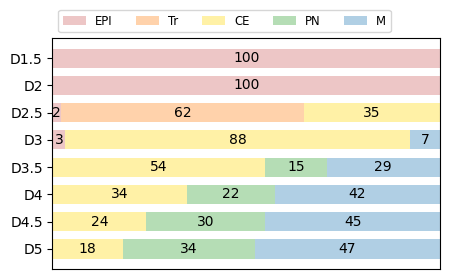

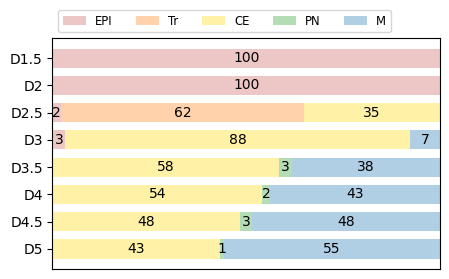

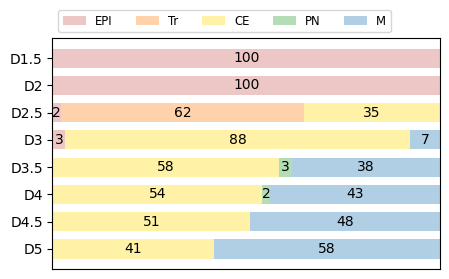

In [3]:
#  Loading the dataset of 3 experiments 
filenames = ('Ch2-5_FGF0-3.txt', 'Ch2-5_FGF0-4.txt', 'Ch2-5_FGF0-5.txt')
cell_dataset = []
for filename in filenames:
    cell_data = get_cell_data(filename)
    cell_data = np.insert(cell_data, 0, cell_data[0], axis = 0) ## s
    col_labels = ['EPI', 'Tr', 'CE', 'PN', 'M']
    row_labels = ['D1.5', 'D2', 'D2.5', 'D3', 'D3.5', 'D4', 'D4.5', 'D5']
    col_colors = ['indianred', 'tab:orange', 'gold', 'tab:green', 'tab:blue']

    for row in cell_data:
        row *= 1./np.sum(row)   # rescale everything to sum up to 1

    cell_dataset.append(cell_data)
    plot_cell_proportions(cell_data, col_labels, col_colors, row_labels)

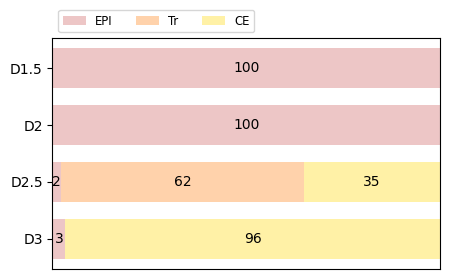

In [4]:
#  Make a subset of data: first 4 timepoints and 3 cell states 
filename = 'Ch2-5_FGF0-3.txt'
cell_data = get_cell_data(filename)
cell_data = np.insert(cell_data, 0, cell_data[0], axis = 0) ## s
col_labels = ['EPI', 'Tr', 'CE', 'PN', 'M']
col_colors = ['indianred', 'tab:orange', 'gold', 'tab:green', 'tab:blue']

cell_data_4  = cell_data[:4]
row_labels_4 = ['D1.5', 'D2', 'D2.5', 'D3']
cell_data_4[-1, 2] = 87
cell_data_4[-1, -1] = 0
cell_data_4 = cell_data_4[:, :3]
col_labels_4 = col_labels[:3]

for row in cell_data_4:
    row *= 1./np.sum(row)

plot_cell_proportions(cell_data_4, col_labels_4, col_colors, row_labels_4)
cell_dataset_0 = (cell_data_4,)

In [5]:
# Set up for optimizing the first 4 timepoints 

time_pars_0 = (0., day*3, 4)
morphogen_times_0 = ((day*1, day*3),)   # Signal is changing at timepoint 1 and timepoint 3 

par_limits = {
    'x': (-2.,2.),
    'y': (-2., 2.),
    'a': (0.,9.),
    's': (0.1, 1.5),
}

par_choice_values = {}

landscape_pars_celldiff = {
    'A0': 0.005,
    'init_cond': (0., 0.),
    'regime': mr_piecewise,
    'n_regimes': 3, # !
    'morphogen_times': morphogen_times_0[0],
    'used_fp_types': [Node],
    'immutable_pars_list': [],
}

prob_pars_celldiff = {
    'prob_add': 0.,
    'prob_drop': 0.,
    'prob_shuffle': 0.
}


fitness_pars_celldiff = {
    'ncells': 300, #
    'cell_data': cell_dataset_0,
    'init_state': 0,
    'attractor_states': (2,),   
    'non_attractor_states': (),
    'noise': 0.1,
    'penalty_weight': .1,
    'time_pars': time_pars_0,
    'morphogen_times': morphogen_times_0,
    'ndt': 50,    # integration steps per time point
}
#  'ndt' largely controls computing time (but 50 might be too small in fact)


Landscape with modules:
Node: x=0.34058880745787157, y=-1.4660595934810745, a=[2.83359266,3.78752738,6.91000913], s=[0.39098041,0.25192056,0.75753504],
Node: x=0.37506890972285634, y=-1.1084483779822722, a=[0.64958019,0.12868873,4.67697054], s=[1.08303856,0.2792156 ,1.48111769],
Node: x=-0.32095321287369005, y=0.5013943326382764, a=[7.98745707,4.10110424,0.54217622], s=[0.83572701,0.97453603,0.57015015]


/Users/victoria/Code/landscapes/src/landscapes/helper_functions.py:22: RuntimeWarning: divide by zero encountered in log
  kl = np.sum(np.where(target != 0., target * np.log(target / result_smoothed), 0.))
/Users/victoria/Code/landscapes/src/landscapes/helper_functions.py:22: RuntimeWarning: invalid value encountered in multiply
  kl = np.sum(np.where(target != 0., target * np.log(target / result_smoothed), 0.))


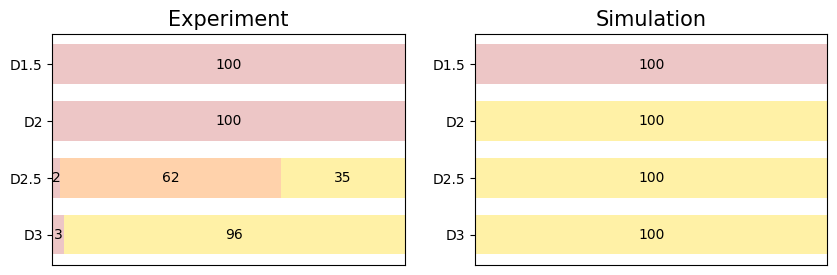

In [6]:
# Set up population 
# Start with 3 modules (red, orange, yellow)
start_module_list = [random.choice(landscape_pars_celldiff['used_fp_types']).generate(par_limits, par_choice_values,
                                                                                      n_regimes=landscape_pars_celldiff[
                                                                                          'n_regimes']) for i in
                     range(cell_dataset_0[0].shape[1])]

start_module_list[2].par_limits = {'x': (-1.,1.), 'y': (-1., 1.)}  # Constrain yellow to be around the center 


N = 16   # Even number - adjust to your computing capacity
P = Population(N, CellDiff_Dataset_Landscape, landscape_pars_celldiff, prob_pars_celldiff,
               fitness_pars_celldiff, par_limits, par_choice_values,
               start_module_list=start_module_list)
print(P.landscape_list[0])

fig = plot_compare_cell_proportions(cell_data_4, P.landscape_list[0].result[0], col_labels_4, col_colors,row_labels_4)
# fig.show()
# plot_cell_proportions(P.landscape_list[0].result[0], col_labels_4, col_colors, row_labels_4)   # result from initial random landscape
# plot_cell_proportions(cell_data_4, col_labels_4, col_colors, row_labels_4)

Timecode: 20240716-165837


/Users/victoria/Code/landscapes/src/landscapes/helper_functions.py:22: RuntimeWarning: divide by zero encountered in log
  kl = np.sum(np.where(target != 0., target * np.log(target / result_smoothed), 0.))
/Users/victoria/Code/landscapes/src/landscapes/helper_functions.py:22: RuntimeWarning: invalid value encountered in multiply
  kl = np.sum(np.where(target != 0., target * np.log(target / result_smoothed), 0.))
/Users/victoria/Code/landscapes/src/landscapes/helper_functions.py:22: RuntimeWarning: divide by zero encountered in log
  kl = np.sum(np.where(target != 0., target * np.log(target / result_smoothed), 0.))
/Users/victoria/Code/landscapes/src/landscapes/helper_functions.py:22: RuntimeWarning: invalid value encountered in multiply
  kl = np.sum(np.where(target != 0., target * np.log(target / result_smoothed), 0.))
/Users/victoria/Code/landscapes/src/landscapes/helper_functions.py:22: RuntimeWarning: divide by zero encountered in log
  kl = np.sum(np.where(target != 0., target * n

Best fitness: -0.023083019270784808
Done


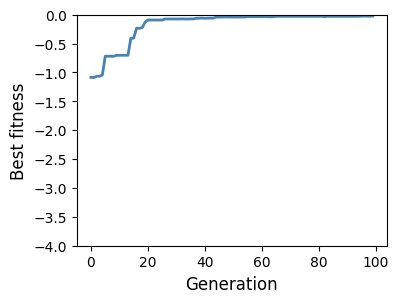

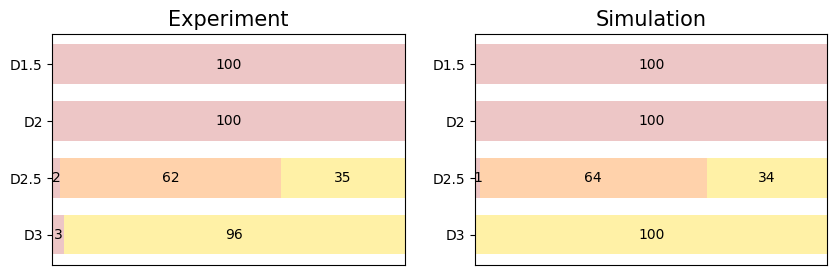

In [7]:
fitness_traj, timecode1, results_dir = P.evolve_parallel(100, fitness_pars_celldiff, save_dir, save_each=1)
print('Done')

fig = plt.figure(figsize=(4,3))
plt.plot(fitness_traj, lw=2, c='steelblue')
plt.xlabel('Generation', fontsize=12)
plt.ylabel('Best fitness', fontsize=12)
plt.ylim((-4,0))
fig.savefig(results_dir+'/result_fitness_traj.png', bbox_inches='tight')

#  Plot result Vs target proportions
fig = plot_compare_cell_proportions(cell_data_4, P.landscape_list[0].result[0], col_labels_4, col_colors,row_labels_4)
plt.show(fig)
fig.savefig(results_dir+'/result_proportions.png', bbox_inches='tight')

Landscape with modules:
Node: x=-1.2660914327849948, y=-1.782444178358984, a=[1.88474045,8.69418305,5.37984157], s=[0.39098041,0.25192056,0.91371576],
Node: x=-0.23978366103381443, y=0.4054550614053265, a=[3.45583193,0.23920047,4.67697054], s=[0.1683285 ,0.2792156 ,1.43354328],
Node: x=-0.6161925936298209, y=0.02804316385143113, a=[4.54130867,4.10110424,0.54217622], s=[0.47226047,0.96991621,0.57015015]


/Users/victoria/Code/landscapes/src/landscapes/landscapes/landscape_class.py:265: RuntimeWarning: divide by zero encountered in divide
  -np.sum((coordinate.T - np.array((module.x, module.y))) ** 2, axis=1) / 2. / st ** 2) / st ** 2
/Users/victoria/Code/landscapes/src/landscapes/landscapes/landscape_class.py:264: RuntimeWarning: invalid value encountered in divide
  prob[:, i] = np.exp(
/Users/victoria/Code/landscapes/src/landscapes/landscapes/landscape_class.py:60: RuntimeWarning: divide by zero encountered in divide
  weight = np.exp(-0.5 * (r / sig) ** 2)


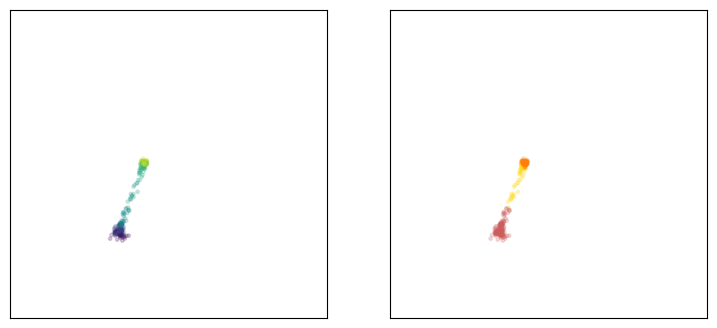

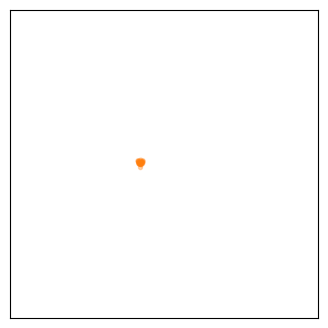

In [8]:
landscape = P.landscape_list[0]
print(landscape)

L = 4.
npoints = 201
q = np.linspace(-L, L, npoints)
xx, yy = np.meshgrid(q, q, indexing='xy')
times = np.array((0., day*1.1))
figures = visualize_all(landscape, xx, yy, times, density=0.45, plot_traj=False, color_scheme='order')

for i in range(len(figures)):
    figures[i].savefig(results_dir+'/result_landscape_'+str(i)+'.png')
    plt.close(figures[i])

landscape.morphogen_times = fitness_pars_celldiff['morphogen_times'][0]
n = 30
landscape.init_cells(n, 0, 0.1)
fig = get_and_plot_traj(landscape, 0, day*3, 11, L, 0.1, frozen=False)
# plt.show(fig)
fig.savefig(results_dir+'/result_cell_trajectories.png', bbox_inches='tight')
fig = plot_cells(landscape, L)
fig.savefig(results_dir+'/result_final_state.png', bbox_inches='tight')
# plt.show(fig)


In [9]:
# Set up for the full optimization 
# To each landscape, add two randomly generated modules (green and blue)
# (Do not run this cell more than once)

par_limits = {
    'x': (-4.,4.),
    'y': (-4., 4.),
    'a': (0.,9.),
    's': (0.1, 1.5),
}

P.par_limits = par_limits


for landscape in P.landscape_list:
    start_module_list = landscape.module_list
    start_module_list.append(random.choice(landscape_pars_celldiff['used_fp_types']).generate(par_limits,
                                                                                              par_choice_values,
                                                                                              n_regimes=
                                                                                              landscape_pars_celldiff[
                                                                                                  'n_regimes']))
    start_module_list.append(random.choice(landscape_pars_celldiff['used_fp_types']).generate(par_limits,
                                                                                              par_choice_values,
                                                                                              n_regimes=
                                                                                              landscape_pars_celldiff[
                                                                                                  'n_regimes']))

# Reset fitness 
for landscape in P.landscape_list:
    landscape.fitness = -np.inf

In [10]:
time_pars = (0., day*7, 8)

#   2 morphogen changing times for each of the 3 experiments 
morphogen_times = ((day*1, day*3), (day*1, day*5), (day*1, day*7))


fitness_pars_celldiff = {
    'ncells': 300, #
    'cell_data': cell_dataset,  # full dataset 
    'init_state': 0,
    'attractor_states': (),
    'non_attractor_states': (),
    'noise': 0.1,
    'penalty_weight': 0.,
    'time_pars': time_pars,
    'morphogen_times': morphogen_times,
    'ndt': 50,
}

Timecode: 20240716-165901


/Users/victoria/Code/landscapes/src/landscapes/helper_functions.py:22: RuntimeWarning: divide by zero encountered in log
  kl = np.sum(np.where(target != 0., target * np.log(target / result_smoothed), 0.))
/Users/victoria/Code/landscapes/src/landscapes/helper_functions.py:22: RuntimeWarning: invalid value encountered in multiply
  kl = np.sum(np.where(target != 0., target * np.log(target / result_smoothed), 0.))
/Users/victoria/Code/landscapes/src/landscapes/helper_functions.py:22: RuntimeWarning: divide by zero encountered in log
  kl = np.sum(np.where(target != 0., target * np.log(target / result_smoothed), 0.))
/Users/victoria/Code/landscapes/src/landscapes/helper_functions.py:22: RuntimeWarning: invalid value encountered in multiply
  kl = np.sum(np.where(target != 0., target * np.log(target / result_smoothed), 0.))
/Users/victoria/Code/landscapes/src/landscapes/helper_functions.py:22: RuntimeWarning: divide by zero encountered in log
  kl = np.sum(np.where(target != 0., target * n

Best fitness: -1.1705873937202074
Done


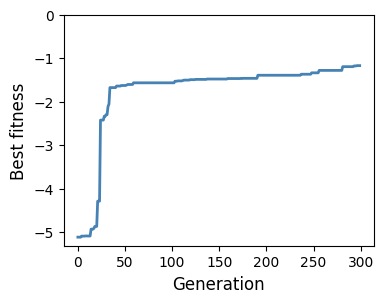

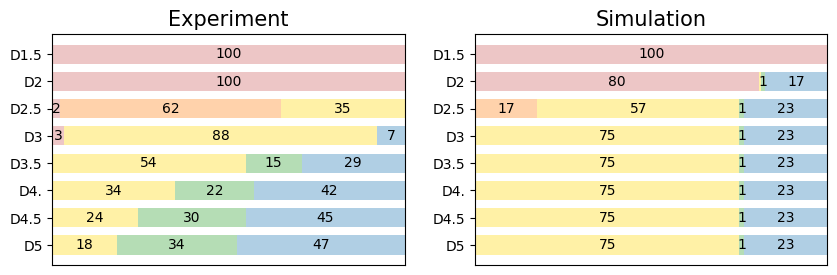

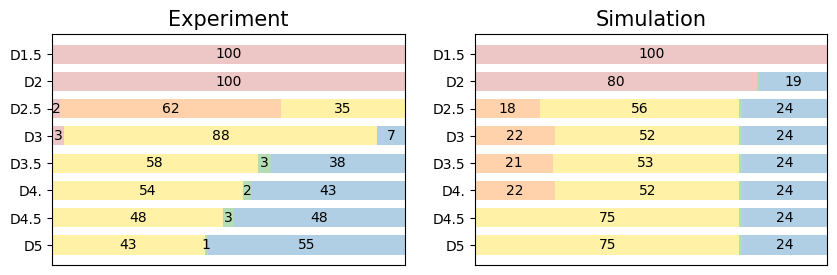

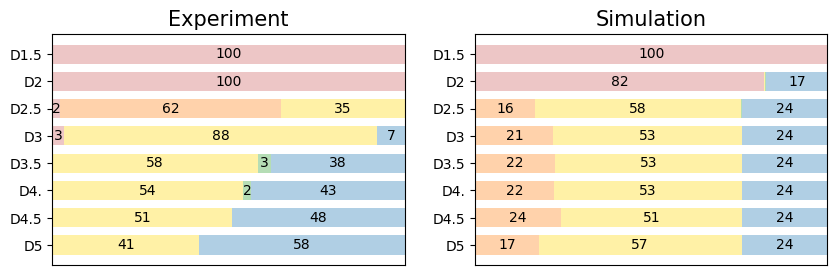

In [11]:
fitness_traj, timecode2, results_dir = P.evolve_parallel(300, fitness_pars_celldiff, save_dir, save_each=1)
print('Done')

fig = plt.figure(figsize=(4,3))
plt.plot(fitness_traj, lw=2, c='steelblue')
plt.xlabel('Generation', fontsize=12)
plt.ylabel('Best fitness', fontsize=12)
plt.gca().set_ylim(top=0)
fig.savefig(results_dir+'/result_fitness_traj.png', bbox_inches='tight')

#  Plot result Vs target proportions
for k in range(len(cell_dataset)):
    fig = plot_compare_cell_proportions(cell_dataset[k], P.landscape_list[0].result[k], col_labels, col_colors, row_labels=None)
    plt.show(fig)
    fig.savefig(results_dir+'/result_proportions_' + str(k) +'.png', bbox_inches='tight')

In [ ]:
# %time fitness_traj = P.evolve_parallel(300, fitness_pars_celldiff, save_dir, save_each=10)
# print('Done')
# 
# plt.figure(figsize=(4,3))
# plt.plot(fitness_traj, lw=2, c='steelblue')
# plt.xlabel('Generation', fontsize=12)
# plt.ylabel('Best fitness', fontsize=12)
# plt.show()
# 
# for k in range(len(cell_dataset)):
#     print(filenames[k])
#     plot_cell_proportions(P.landscape_list[0].result[k], col_labels, col_colors, row_labels=None)   # result 
#     plot_cell_proportions(cell_dataset[k], col_labels, col_colors, row_labels=None)                 # target 

Landscape with modules:
Node: x=0.23211936882280115, y=-1.7347257456930611, a=[1.88474045,3.18987796,6.7878941 ], s=[0.22780088,0.61051157,0.2426042 ],
Node: x=-0.23978366103381443, y=0.430328717513043, a=[0.64958019,0.23920047,3.2137594 ], s=[0.63338551,0.2792156 ,0.7697189 ],
Node: x=-0.6161925936298209, y=-0.07671051102756654, a=[6.04829897,4.10110424,7.7301259 ], s=[0.28566699,0.97453603,0.57015015],
Node: x=1.724212957066511, y=-2.6605794774241467, a=[8.34689761,1.77020512,6.27543141], s=[0.57362891,0.32908059,1.2552909 ],
Node: x=-3.2909025685891757, y=-2.526369215730754, a=[5.92875597,8.73413918,6.42297091], s=[1.24468514,0.98659847,1.11948144]


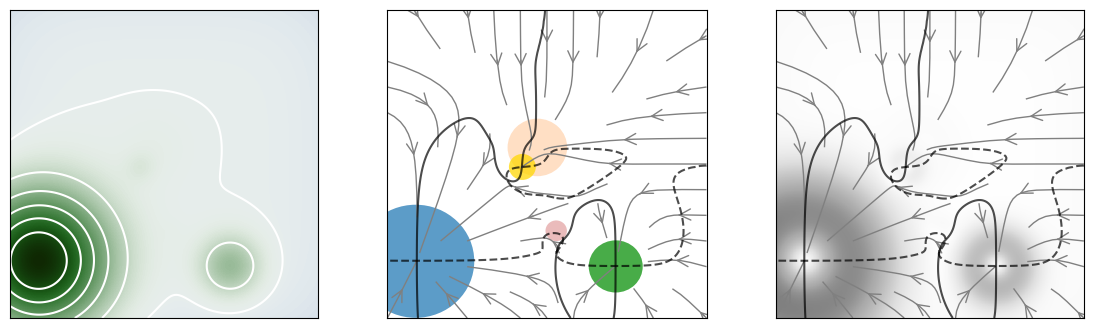

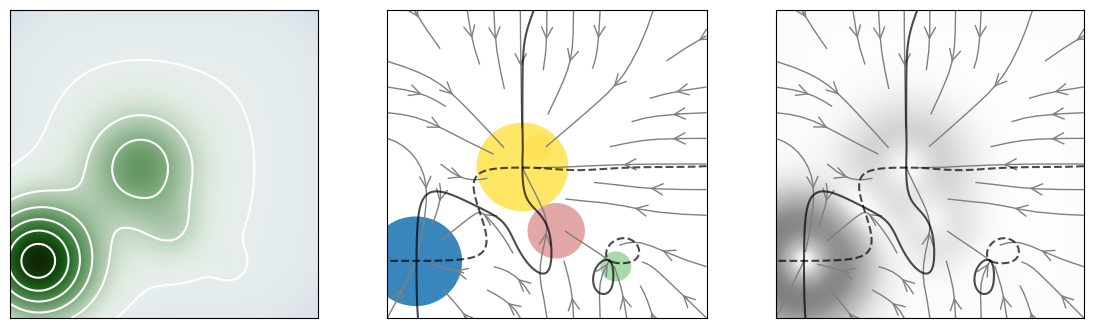

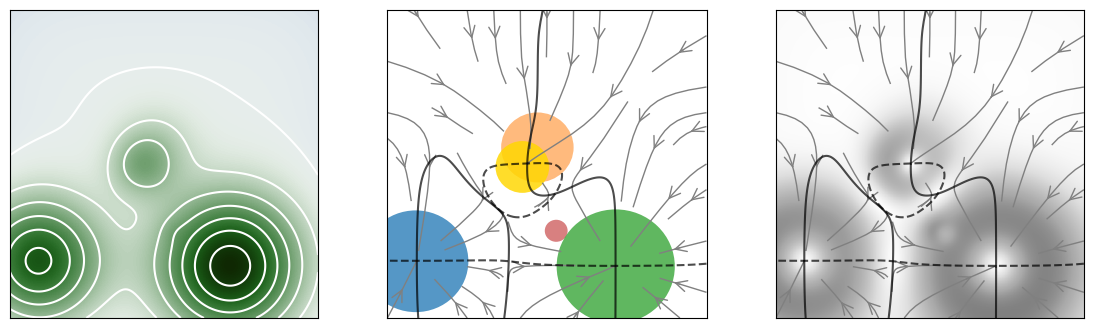

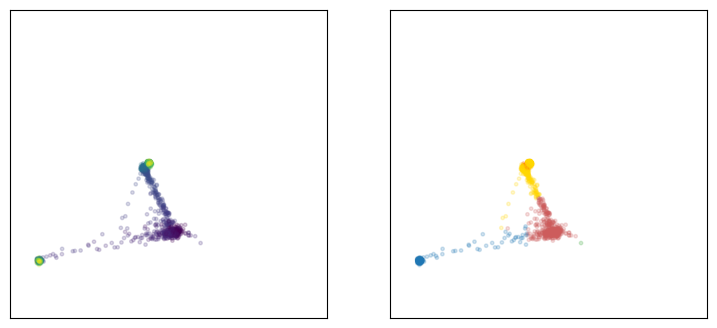

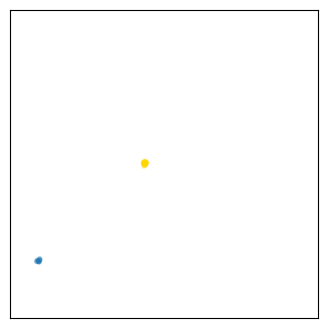

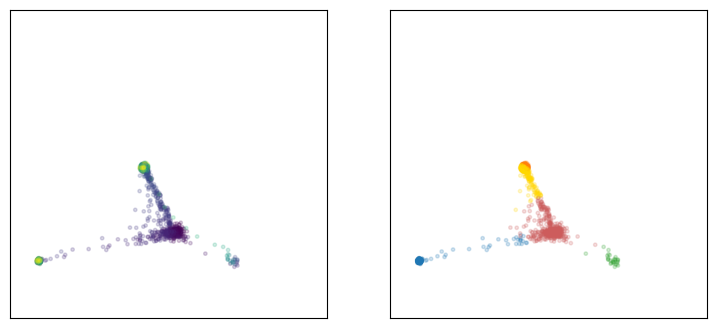

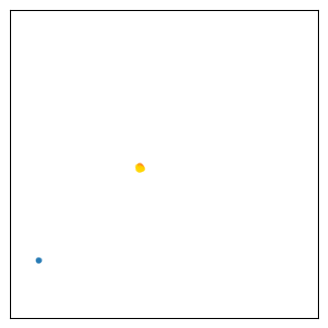

In [13]:
landscape = P.landscape_list[0]
print(landscape)

L = 4.
npoints = 201
q = np.linspace(-L, L, npoints)
xx, yy = np.meshgrid(q, q, indexing='xy')
times = np.array((0., day*2, day*10))
figures = visualize_all(landscape, xx, yy, times, density=0.45, plot_traj=False, color_scheme='order')

for i in range(len(figures)):
    plt.show(figures[i])
    figures[i].savefig(results_dir+'/result_landscape_'+str(i)+'.png')
    plt.close(figures[i])

#  Plot trajectories of the first experiment 
landscape.morphogen_times = fitness_pars_celldiff['morphogen_times'][0]
n = 50
landscape.init_cells(n, 0, 0.1)
fig = get_and_plot_traj(landscape, 0, day*7, 51, L, 0.1, frozen=False)
fig.savefig(results_dir+'/result_cell_trajectories_1.png', bbox_inches='tight')
fig = plot_cells(landscape, L)
fig.savefig(results_dir+'/result_final_state_1.png', bbox_inches='tight')



#  Plot trajectories of the third experiment 
landscape.morphogen_times = fitness_pars_celldiff['morphogen_times'][2]
n = 50
landscape.init_cells(n, 0, 0.1)
fig = get_and_plot_traj(landscape, 0, day*7, 51, L, 0.1, frozen=False)
fig.savefig(results_dir+'/result_cell_trajectories_2.png', bbox_inches='tight')
fig = plot_cells(landscape, L)
fig.savefig(results_dir+'/result_final_state_2.png', bbox_inches='tight')


In [ ]:
log_filename = save_dir+'/'+ landscape.__class__.__name__+'/optimization_log.csv'
if not os.path.exists(log_filename):
    with open(log_filename, 'a') as f:
        f.write('# Main timecode\tInit timecode\tFitness\n')
    
with open(log_filename, 'a') as f:
    f.write('\t'.join([timecode2, timecode1, str(P.landscape_list[0].fitness)]) + '\n')

In [ ]:
#   Can do another run of optimization with updated fitness parameters 
#   I.e. edd penalty on cell state stability (0, 3, 4 should be attractors)

# for landscape in P.landscape_list:
#     landscape.fitness = -np.inf
# 
# fitness_pars_celldiff = {
#     'ncells': 300, #
#     'cell_data': cell_dataset,
#     'init_state': 0,
#     'attractor_states': (0, 3, 4),
#     'non_attractor_states': (),
#     'noise': 0.1,
#     'penalty_weight': 0.5,
#     'time_pars': time_pars,
#     'morphogen_times': morphogen_times,
#     'ndt': 50,
# }